# Clustering

Cluster data to find similar patterns in building heat consumption.

## Cluster with Meta Data

In [1]:
import polars as pl

from src.energy_forecast.config import DATA_DIR

df = pl.read_csv(DATA_DIR / "processed" / "dataset_daily_feat.csv")
df

2025-03-24 20:00:13.616 | INFO     | src.energy_forecast.config:<module>:11 - PROJ_ROOT path is: /home/marja/PycharmProjects/energy-forecast-wahl


id,datetime,diff,typ,min_vorlauf_temp,max_vorlauf_temp,primary_energy,diff_t-1,hum_avg,hum_min,hum_max,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,daily_avg,heated_area,anzahlwhg,ground_surface,building_height,storeys_above_ground,weekend,holiday
str,str,f64,i64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,i64,i64
"""400284SVG""","""2018-02-25T00:00:00.000000""",441.4,0,null,null,"""gas""",384.9,87.791667,79.0,91.0,-5.3,-8.4,-2.5,3.9,0.0,5.0,7.6,23.8,1033.5,36.0,175.673058,3684.0,48,null,null,null,1,1
"""400284SVG""","""2018-02-26T00:00:00.000000""",440.3,0,null,null,"""gas""",441.4,83.083333,68.0,92.0,-6.3,-11.9,-1.4,0.8,90.0,4.0,10.8,38.9,1030.8,282.0,175.673058,3684.0,48,null,null,null,0,1
"""400284SVG""","""2018-02-27T00:00:00.000000""",461.5,0,null,null,"""gas""",440.3,76.833333,50.0,91.0,-6.9,-13.4,-2.3,2.5,100.0,13.0,14.4,52.9,1024.7,264.0,175.673058,3684.0,48,null,null,null,0,1
"""400284SVG""","""2018-02-28T00:00:00.000000""",496.0,0,null,null,"""gas""",461.5,61.25,43.0,81.0,-10.6,-16.1,-6.4,0.0,110.0,65.0,18.4,43.9,1028.4,564.0,175.673058,3684.0,48,null,null,null,0,1
"""400284SVG""","""2018-03-01T00:00:00.000000""",504.5,0,null,null,"""gas""",496.0,61.166667,40.0,77.0,-7.8,-12.4,-3.2,0.0,90.0,74.0,22.7,50.4,1020.1,582.0,175.673058,3684.0,48,null,null,null,0,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""6abb785c-dfff-11eb-9d61-02b402…","""2023-07-03T00:00:00.000000""",238.43,0,null,null,"""gas""",253.12,53.875,38.0,69.0,18.4,13.4,24.0,0.0,0.0,250.0,18.6,58.0,1013.6,438.0,681.332865,3012.0,32,null,null,null,0,0
"""6abb785c-dfff-11eb-9d61-02b402…","""2023-07-04T00:00:00.000000""",216.96,0,null,null,"""gas""",238.43,51.125,28.0,83.0,20.1,14.3,26.9,5.7,0.0,240.0,14.6,46.1,1014.6,714.0,681.332865,3012.0,32,null,null,null,0,0
"""6abb785c-dfff-11eb-9d61-02b402…","""2023-07-05T00:00:00.000000""",246.34,0,null,null,"""gas""",216.96,60.708333,36.0,95.0,18.1,12.6,23.0,0.4,0.0,231.0,17.6,56.5,1014.0,510.0,681.332865,3012.0,32,null,null,null,0,0


In [16]:
df_meta = df.group_by("id").agg(pl.col("diff"),
                      pl.col("daily_avg").mode().first().alias("avg"),
                      pl.col("diff").std().alias("std"),
                      pl.col("diff").median().alias("median"),
                      pl.col("diff").min().alias("min"),
                      pl.col("diff").max().alias("max"),
                      pl.col("diff").head(30).alias("month"),
                      pl.len()
                      ).sort("len")
df_meta

id,diff,avg,std,median,min,max,month,len
str,list[f64],f64,f64,f64,f64,f64,list[f64],u32
"""400974GVG""","[73.0, 86.0, … 187.0]",157.5,83.835169,158.5,6.0,333.0,"[73.0, 86.0, … 10.0]",74
"""578e031d-e014-11eb-9d61-02b402…","[570.0, 570.0, … 281.0]",532.711111,61.517376,540.5,281.0,654.0,"[570.0, 570.0, … 527.0]",90
"""400926GVG""","[38.7, 35.2, … 22.5]",34.037168,3.46127,33.4,22.5,43.1,"[38.7, 35.2, … 35.4]",113
"""400884GVG""","[6.7, 16.6, … 11.5]",7.032231,2.358291,6.4,3.4,17.0,"[6.7, 16.6, … 6.8]",121
"""400961GVG""","[40.2, 39.2, … 19.1]",53.723256,9.602559,54.7,19.1,72.8,"[40.2, 39.2, … 57.4]",129
…,…,…,…,…,…,…,…,…
"""400088PVG""","[81.5, 94.9, … 203.6]",281.750487,187.650068,265.65,0.0,947.8,"[81.5, 94.9, … 80.0]",1656
"""400103PVG""","[82.5, 78.8, … 184.2]",262.998194,160.896844,232.2,38.2,840.3,"[82.5, 78.8, … 144.4]",1657
"""400104PVG""","[204.0, 141.4, … 646.0]",948.490898,699.630287,918.0,0.0,3164.0,"[204.0, 141.4, … 361.0]",1659


<Axes: xlabel='avg', ylabel='std'>

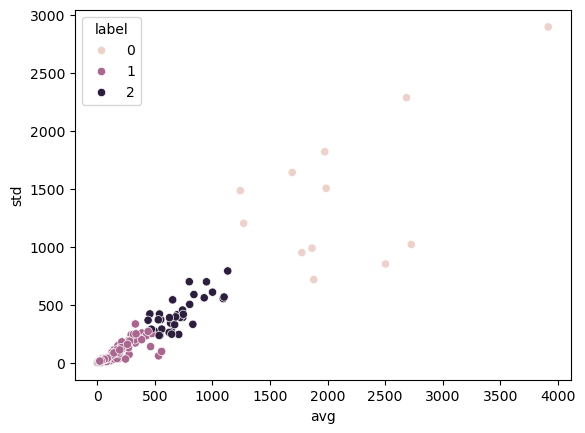

In [44]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns

data = df_meta.drop(["id", "diff", "month", "len"]).to_numpy()

# Create the AgglomerativeClustering model
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model and predict cluster labels
labels = model.fit_predict(data)

fig, ax = plt.subplots()
sns.scatterplot(
    pl.concat([df_meta, pl.DataFrame(labels, schema=["label"])], how="horizontal").to_pandas(),
    x="avg",
    y="std",
    hue="label",
    ax=ax,
)

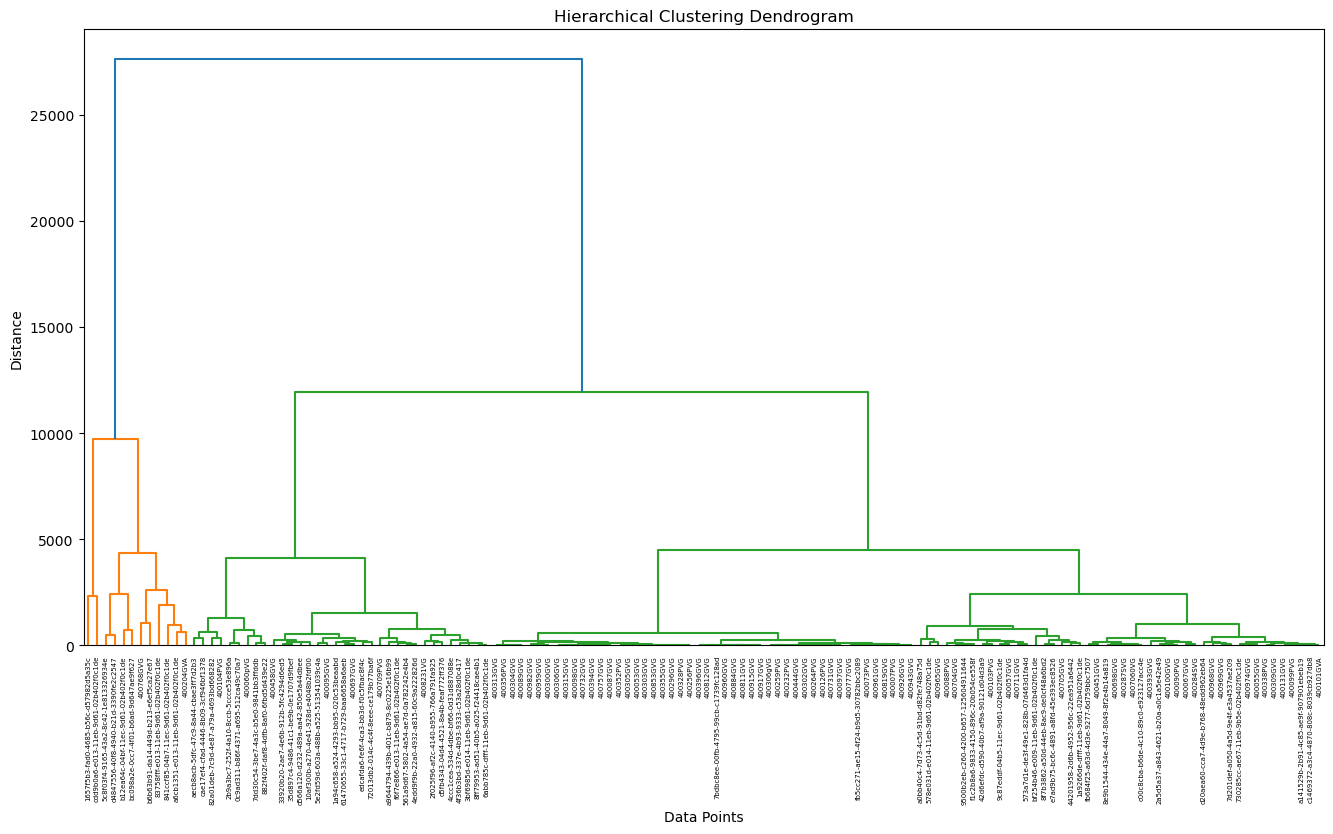

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Perform hierarchical clustering using SciPy
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(16, 8))
dendrogram(linked, labels=df_meta["id"], leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

## Cluster by sequence

<Axes: xlabel='avg', ylabel='std'>

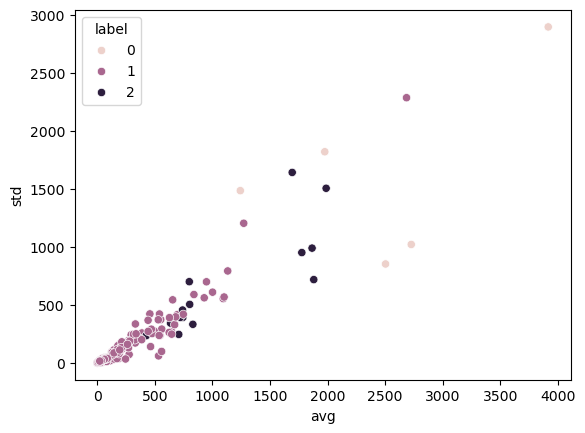

In [51]:
df_sequence = df_meta.cast({"month": pl.Array(pl.Float64, 30)}
             ).with_columns(pl.col("month").arr.to_struct().alias("month_expanded")
                            ).unnest("month_expanded"
                                     ).drop(["id", "diff", "month", "len", "avg", "std", "median", "min", "max"])

data = df_sequence.to_numpy()

# Create the AgglomerativeClustering model
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model and predict cluster labels
labels = model.fit_predict(data)

fig, ax = plt.subplots()
sns.scatterplot(
    pl.concat([df_meta, pl.DataFrame(labels, schema=["label"])], how="horizontal").to_pandas(),
    x="avg",
    y="std",
    hue="label",
    ax=ax,
)